In [16]:
from sklearn import cluster,datasets,mixture
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import random
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
from sklearn.mixture import GaussianMixture
plt.rcParams["axes.grid"] = False

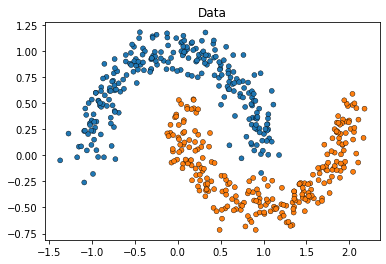

In [51]:
noisy_moons=datasets. make_moons(n_samples=500,noise=0.11)
X,y=noisy_moons
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plt.show()
Y=y

# Part A

In [59]:
X1 = X[y == 0]
X2 = X[y == 1]

(250, 2)

In [63]:
from sklearn.mixture import BayesianGaussianMixture

#first Class
BDE1 = BayesianGaussianMixture(n_components=1,covariance_type='full').fit(X1)
print('\u03BC = ', BDE1.means_, sep="\n")
print('\u03A3 = ', BDE1.covariances_, sep="\n")
means1=BDE1.means_
covariances1=BDE1.covariances_

#Second Class
BDE2 = BayesianGaussianMixture(n_components=1,covariance_type='full').fit(X2)
print('\u03BC = ', BDE2.means_, sep="\n")
print('\u03A3 = ', BDE2.covariances_, sep="\n")
means2=BDE2.means_
covariances2=BDE2.covariances_

μ = 
[[-0.0179904   0.63494305]]
Σ = 
[[[0.50775717 0.0014569 ]
  [0.0014569  0.11260546]]]
μ = 
[[ 1.01400401 -0.13278198]]
Σ = 
[[[ 5.03030777e-01 -4.63389642e-04]
  [-4.63389642e-04  1.04461715e-01]]]


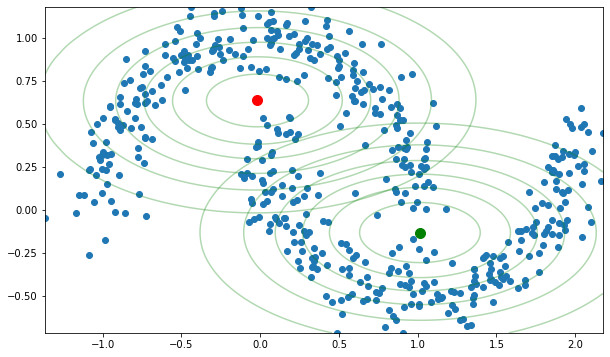

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T

# Plot   
fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
ax0.scatter(X[:,0],X[:,1])

for m,c in zip(means1,covariances1):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='green',alpha=0.3)
    ax0.scatter(m[0],m[1],c='red',zorder=10,s=100)

for m,c in zip(means2,covariances2):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='green',alpha=0.3)
    ax0.scatter(m[0],m[1],c='green',zorder=10,s=100)

    

plt.show()

# Part B

In [20]:
# Create a grid for visualization purposes 
x = np.linspace(np.min(X[...,0])-0.5,np.max(X[...,0])+0.5,150)
y = np.linspace(np.min(X[...,1])-0.5,np.max(X[...,1])+0.5,120)
X_,Y_ = np.meshgrid(x,y)
pos = np.array([X_.flatten(),Y_.flatten()]).T

In [32]:
def gmm1(X,Y,k):
    # create and initialize the cluster centers and the weight paramters
    weights = np.ones((k)) / k
    means = (np.random.rand(k,2)+1)*np.average(X)
    for i in range(2):
        means[i][0]=np.average(X[Y==i, 0])
        means[i][1]=np.average(X[Y==i, 1])
    for i in range(2,k):
        means[i][0]=random.uniform(np.min(X[:,0]), np.max(X[:,0]))
        means[i][1]=random.uniform(np.min(X[:,1]), np.max(X[:,1]))
    # create and initialize a Positive semidefinite convariance matrix 
    cov = []
    for i in range(k):
        cov.append(make_spd_matrix(X.shape[1]))
    cov = np.array(cov)

    eps=1e-8

    # run GMM for "iters" steps
    iters=41
    for step in range(iters):

    # visualize the learned clusters
        if step == 40:
            plt.figure(figsize=(12,16))
            splot = plt.subplot(2, 1, 1)
            plt.title("Iteration {}".format(step))
            axes = plt.gca()
            
            likelihood = []
            for j in range(k):
                likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j]))
            likelihood = np.array(likelihood)
            predictions = np.argmax(likelihood, axis=0)
            
            for c in range(k):
                pred_ids = np.where(predictions == c)
                plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color='white', alpha=0.2, edgecolors='none') #changedddd


            plt.scatter(X[:,0], X[:,1], c='black')
            
            for j in range(k):
                plt.scatter(means[j][0], means[j][1], color='white')  #changeddd


            for i in range(k):
            # Plot ellipses to show the Gaussian components
                covariances = cov[i]
                v, w = np.linalg.eigh(covariances)
                u = w[0] / np.linalg.norm(w[0])
                v = 2. * np.sqrt(2.) * np.sqrt(v)
                angle = np.arctan(u[1] / u[0])
                angle = 180. * angle / np.pi  # convert to degrees
                ell = mpl.patches.Ellipse(means[i], v[0], v[1], 180. + angle, color='tab:blue')
                ell.set_clip_box(splot.bbox)
                ell.set_alpha(0.5)
                splot.add_artist(ell)

            
            plt.show()

        likelihood = []
        # Expectation step
        for j in range(k):
            likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j]))
        likelihood = np.array(likelihood)
        assert likelihood.shape == (k, len(X))
            
        b = []
        # Maximization step 
        for j in range(k):
            # use the current values for the parameters to evaluate the posterior
            # probabilities of the data to have been generanted by each gaussian
            b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))

            # update mean and variance
            means[j] = np.sum(b[j].reshape(len(X),1) * X, axis=0) / (np.sum(b[j]+eps))
            cov[j] = np.dot((b[j].reshape(len(X),1) * (X - means[j])).T, (X - means[j])) / (np.sum(b[j])+eps)

            # update the weights
            weights[j] = np.mean(b[j])
            
            assert cov.shape == (k, X.shape[1], X.shape[1])
            assert means.shape == (k, X.shape[1])

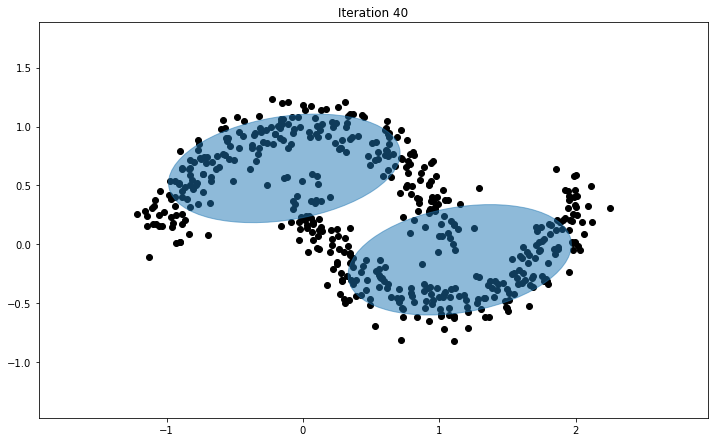

In [33]:
gmm1(X,Y,2)

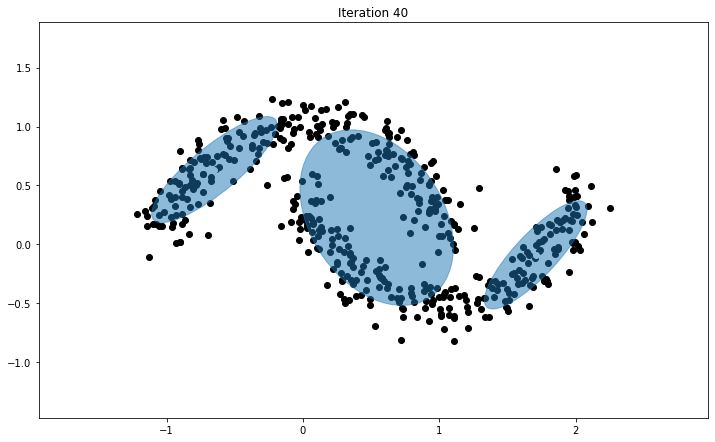

In [34]:
gmm1(X,Y,3)

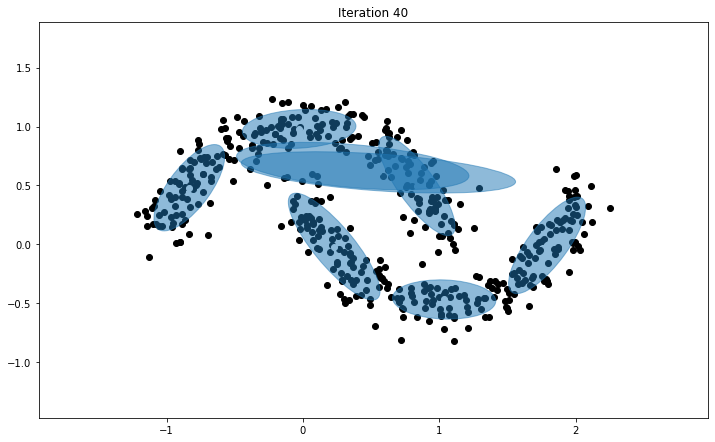

In [35]:
gmm1(X,Y,8)

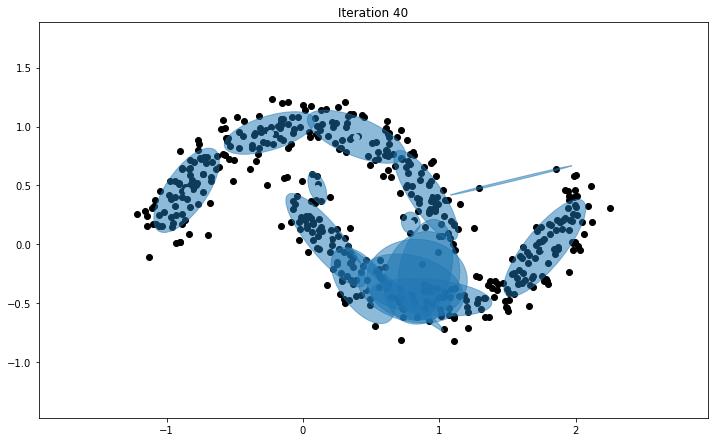

In [36]:
gmm1(X,Y,16)

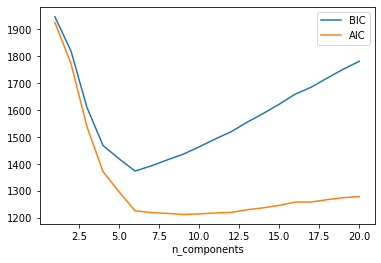

In [37]:
bic1=[]
aic1=[]
for i in range(1,21):
    gmm2=GaussianMixture(n_components=i,covariance_type='full',random_state=0).fit(X)
    bic1.append(gmm2.bic(X))
    aic1.append(gmm2.aic(X))
plt.plot(range(1,21), bic1, label='BIC')
plt.plot(range(1,21), aic1, label='AIC')
plt.legend(scatterpoints=1, loc='upper right', prop=dict(size=10))
plt.xlabel('n_components')
plt.show()